# <font color='blue'>Bike Sharing Dataset</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Este conjunto de dados contém a contagem horária e diária de bicicletas alugadas entre os anos de 2011 e 2012 com as informações meteorológicas e sazonais correspondentes de um sistema de bicicletas compartilhadas. <br><br>
Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicionais, onde todo o processo de adesão, aluguel e devolução se tornou automático. Através desses sistemas, o usuário pode facilmente alugar uma bicicleta de um determinado local e devolver em outro. Existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, totalizando mais de 500 mil bicicletas. Hoje, existe um grande interesse nestes sistemas devido ao seu importante papel nas questões de trânsito, ambientais e de saúde. <br><br>
Além das aplicações interessantes oferecidas pelos sistemas de compartilhamento de bicicletas no mundo real, as características dos dados gerados por estes sistemas os tornam atraentes para pesquisas. Ao contrário de outros serviços de transporte, como ônibus ou metrô, a duração da viagem, o local de partida e chegada são registrados explicitamente nesses sistemas. Esse recurso transforma o sistema de compartilhamento de bicicletas em uma rede de sensores virtuais que pode ser usada para detectar a mobilidade na cidade. Assim, espera-se que a maioria dos eventos importantes na cidade possam ser detectados através do monitoramento desses dados. <br>
    
Descrição das variáveis:<br>
- **instancia**: númerdo do registro;<br>
- **data**: data do aluguel;<br>
- **estacao**: estação do ano (1: inverno; 2: primavera; 3: verão; 4: outono); <br>
- **ano**: ano (0: 2011; 1: 2012);<br> 
- **mes**: mês (1 a 12); <br>
- **hora**: hora (0 a 23); <br>
- **feriado**: indica se o dia é feriado ou não (0: não, 1: sim); <br>
- **dia_da_semana**: dia da semana (0 a 6); <br>
- **dia_de_trabalho**: se o dia não for fim de semana nem feriado, então é 1, caso contrário é 0; <br>
- **condicao_tempo**: condição do tempo (1: Claro, Poucas nuvens, Parcialmente nublado; 2: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Poucas nuvens, Névoa; 3: Neve fraca, Chuva fraca + Trovoada + Nuvens dispersas, Chuva fraca + Nuvens dispersas; 4: Chuva Pesada + Gelo + Trovoada + Névoa, Neve + Neblina); <br>
- **temperatura**: temperatura em graus Celsius (normalizado); <br>
- **sensacao_termica**: sensação térmica em graus Celsius (normalizado); <br>
- **umidade**: umidade relativa do ar (máximo de 100), normalizado;<br>
- **veloc_vento**: velocidade do vento (máximo de 67), normalizado; <br>
- **casual**: contagem de usuários casuais; <br>
- **registrado**: contagem de usuários registrados; <br>
- **contagem**: (variável alvo) quantidade total de bicicletas alugadas, incluindo usuários casuais e registrados. <br>

Bike Sharing Dataset possui dois arquivos:<br>
- **hour.csv**: contém a quantidade de bicicletas alugadas por hora. Registros: 17379 horas; <br>
- **day.csv**: possui a quantidade de bicicletas alugadas por dia. Registros: 731 dias;<br>

Obs.: Trabalharemos com o arquivo hour.csv

Endereço do conjunto de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Seleção de variáveis
from sklearn.feature_selection import RFE, SelectKBest

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import r2_score, mean_absolute_error

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Coletando os dados 
df = pd.read_csv('Dados/Bike-Sharing/hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
# Renomeando as colunas
colunas = ['instancia', 'data', 'estacao', 'ano', 'mes', 'hora', 'feriado', 'dia_da_semana', 'dia_de_trabalho', 'condicao_tempo', 'temperatura', 'sensacao_termica', 'umidade', 
           'veloc_vento', 'casual', "registrado", 'contagem']
df.columns = colunas

# Separando a variável alvo
variavelAlvo = "contagem"

# Visualizando primeiras linhas
df.head()

,instancia,data,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Excluindo colunas desnecessárias
df.drop(['instancia', 'data'], axis=1, inplace = True)
df.head()

,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 3 - Reservar linhas para validar o modelo

In [6]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=1)
dfValidacao

,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
15652,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389
3085,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146


In [7]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
0,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [9]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estacao           17377 non-null  int64  
 1   ano               17377 non-null  int64  
 2   mes               17377 non-null  int64  
 3   hora              17377 non-null  int64  
 4   feriado           17377 non-null  int64  
 5   dia_da_semana     17377 non-null  int64  
 6   dia_de_trabalho   17377 non-null  int64  
 7   condicao_tempo    17377 non-null  int64  
 8   temperatura       17377 non-null  float64
 9   sensacao_termica  17377 non-null  float64
 10  umidade           17377 non-null  float64
 11  veloc_vento       17377 non-null  float64
 12  casual            17377 non-null  int64  
 13  registrado        17377 non-null  int64  
 14  contagem          17377 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [10]:
# Convertendo variáveis do tipo inteiro ou float para o tipo categórica
df.estacao = df.estacao.astype("category")
df.ano = df.ano.astype("category")
df.mes = df.mes.astype("category")
df.hora = df.hora.astype("category")
df.feriado = df.feriado.astype("category")
df.dia_da_semana = df.dia_da_semana.astype("category")
df.dia_de_trabalho = df.dia_de_trabalho.astype("category")
df.condicao_tempo = df.condicao_tempo.astype("category")

In [11]:
# Sumário estatístico
df.describe()

,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,0.496983,0.475771,0.627199,0.190104,35.675606,153.778500,189.454106
std,0.192567,0.171860,0.192920,0.122345,49.307572,151.356901,181.391422
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### 4.2 - Tratando valores nulos

In [12]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum() 

estacao             0
ano                 0
mes                 0
hora                0
feriado             0
dia_da_semana       0
dia_de_trabalho     0
condicao_tempo      0
temperatura         0
sensacao_termica    0
umidade             0
veloc_vento         0
casual              0
registrado          0
contagem            0
dtype: int64

#### 4.3 - Tratando dados duplicados

In [13]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira é igual a outra
df.duplicated().sum()

2

In [14]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df.drop_duplicates(ignore_index=True, inplace = True)

#### 4.4 - Tratando valores únicos

In [15]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

estacao               4
ano                   2
mes                  12
hora                 24
feriado               2
dia_da_semana         7
dia_de_trabalho       2
condicao_tempo        4
temperatura          50
sensacao_termica     65
umidade              89
veloc_vento          30
casual              322
registrado          776
contagem            869
dtype: int64

#### 4.5 - Análise descritiva dos dados

##### 4.5.1 - Parâmetros dos gráficos

In [16]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.5.2 - Funções para desenhar os gráficos

###### a) Histograma

In [17]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [18]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Scatter Plot

In [19]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### d) Gráfico de Pizza

In [20]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### d) Countplot

In [21]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"), order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### e) Barplot

In [22]:
# Função para plotar um gráfico da média da variável alvo de acordo com uma determinada variável
def desenhaBarplotMedia(variavelAnalisada):
    ax = df.groupby(variavelAnalisada)[variavelAlvo].agg(["mean"]).sort_values(by=["mean"], ascending=False).plot.bar(figsize=(13, 6))
    plt.title("Média da variável alvo de acordo com a coluna " + variavelAnalisada, fontsize = 16)
    plt.xticks(rotation=0)
    ax.set_ylabel("Média", fontsize = 12)
    plt.legend('', frameon=False)#remove a legenda
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

##### 4.5.3 Análise descritiva das variáveis quantitativas

Resumo estatístico da variável temperatura
 count    17375.000000
mean         0.496989
std          0.192564
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temperatura, dtype: float64


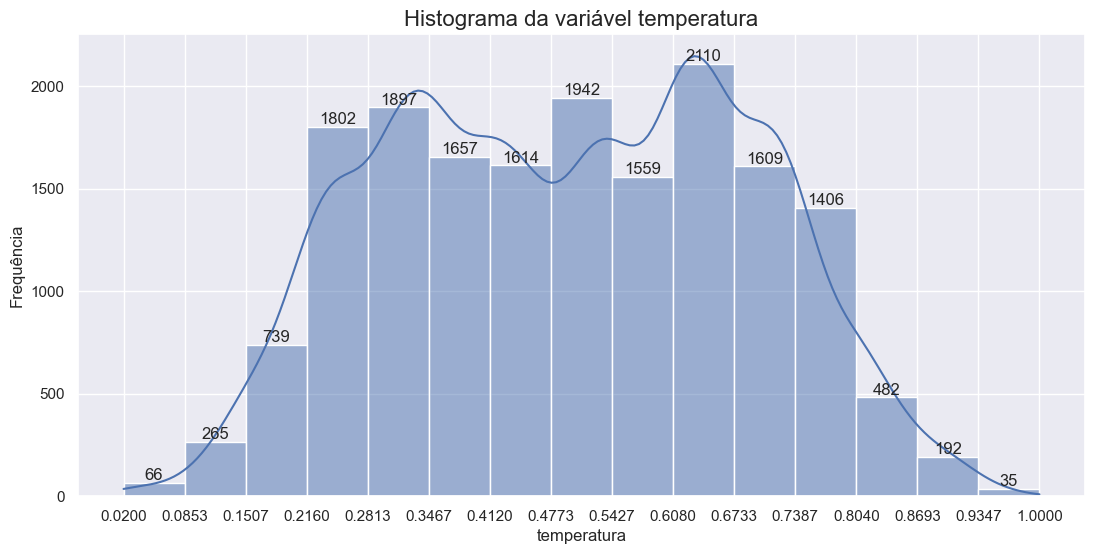

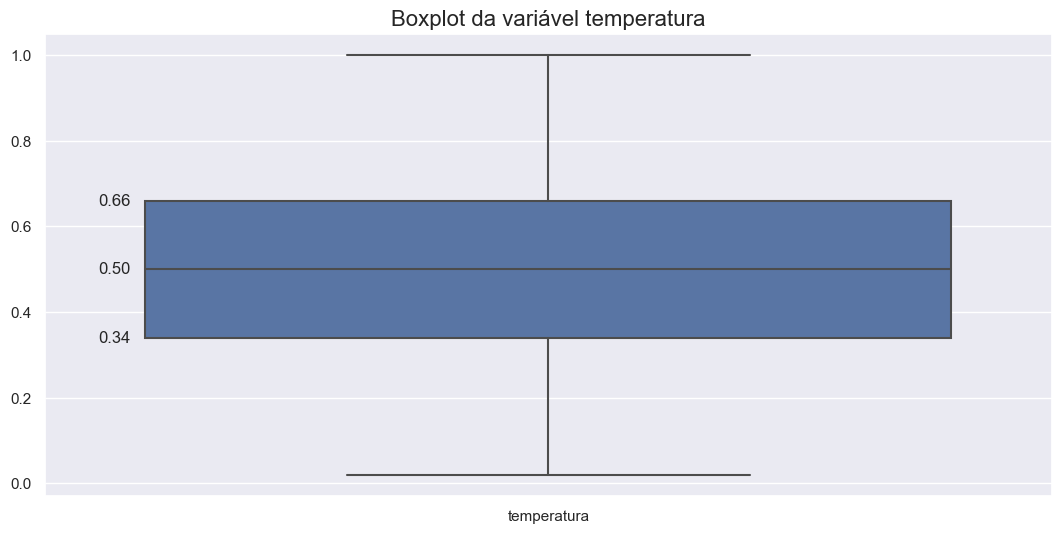

Resumo estatístico da variável sensacao_termica
 count    17375.000000
mean         0.475776
std          0.171859
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: sensacao_termica, dtype: float64


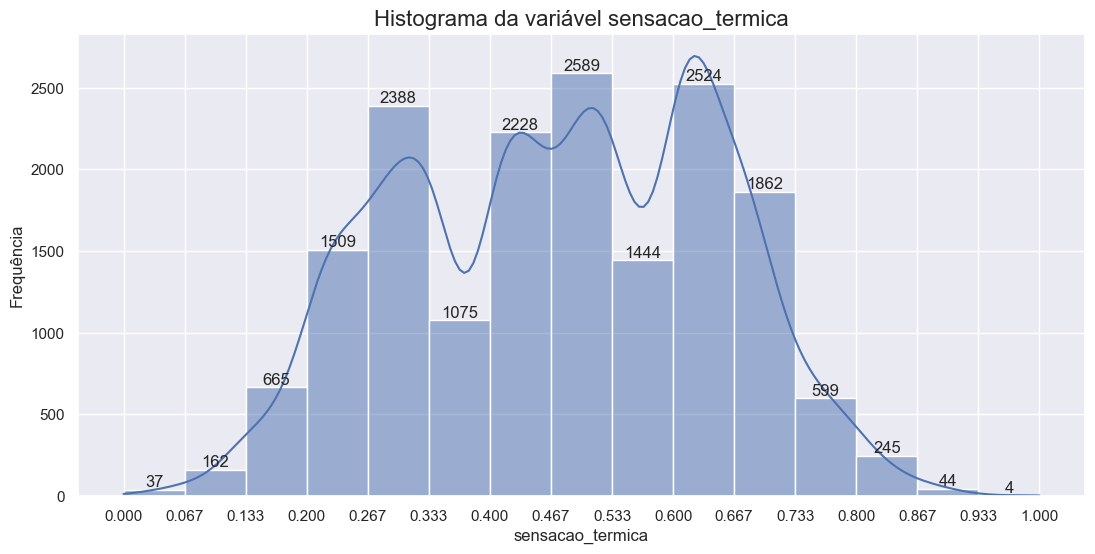

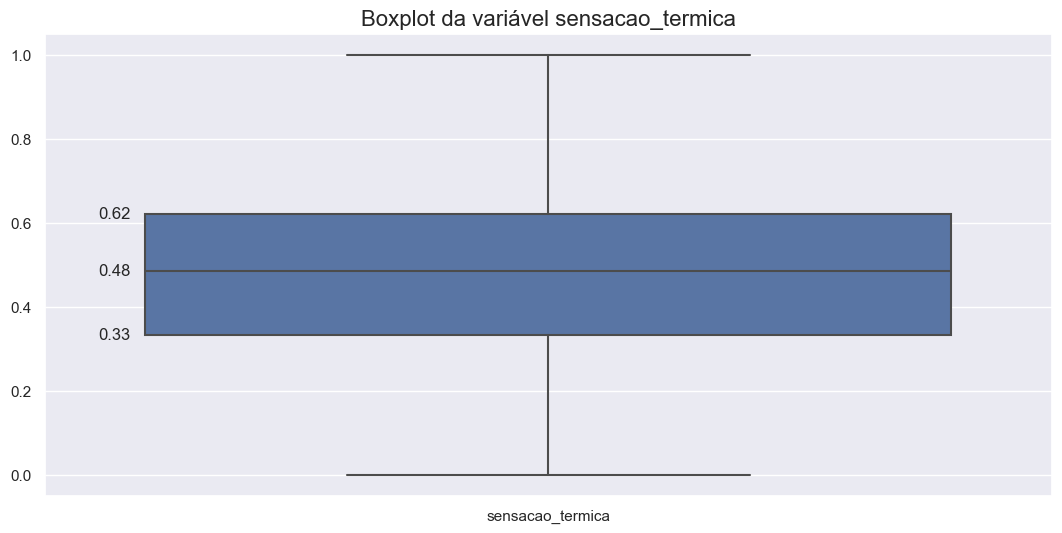

Resumo estatístico da variável umidade
 count    17375.000000
mean         0.627186
std          0.192925
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: umidade, dtype: float64


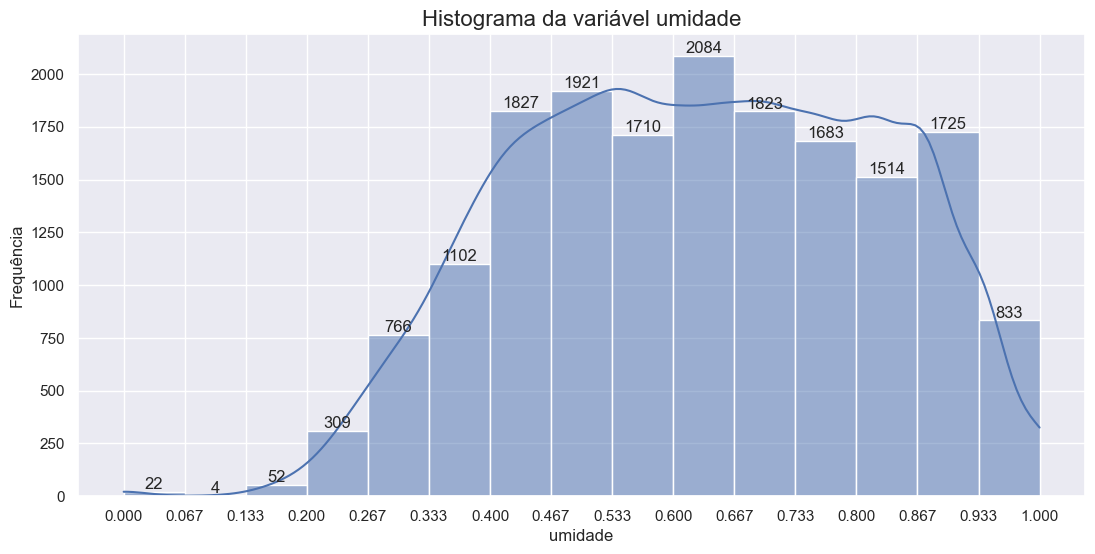

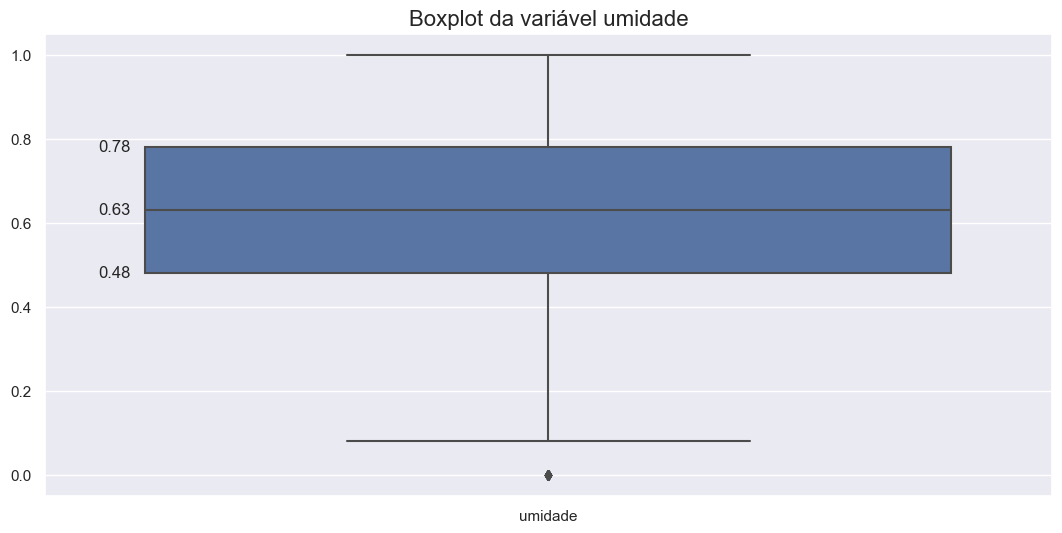

Resumo estatístico da variável veloc_vento
 count    17375.000000
mean         0.190115
std          0.122348
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: veloc_vento, dtype: float64


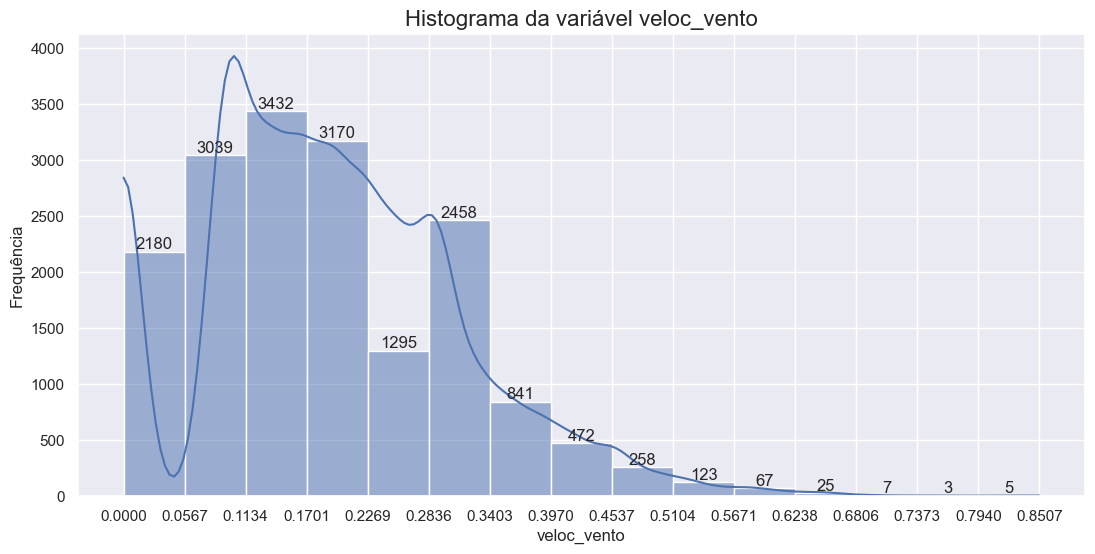

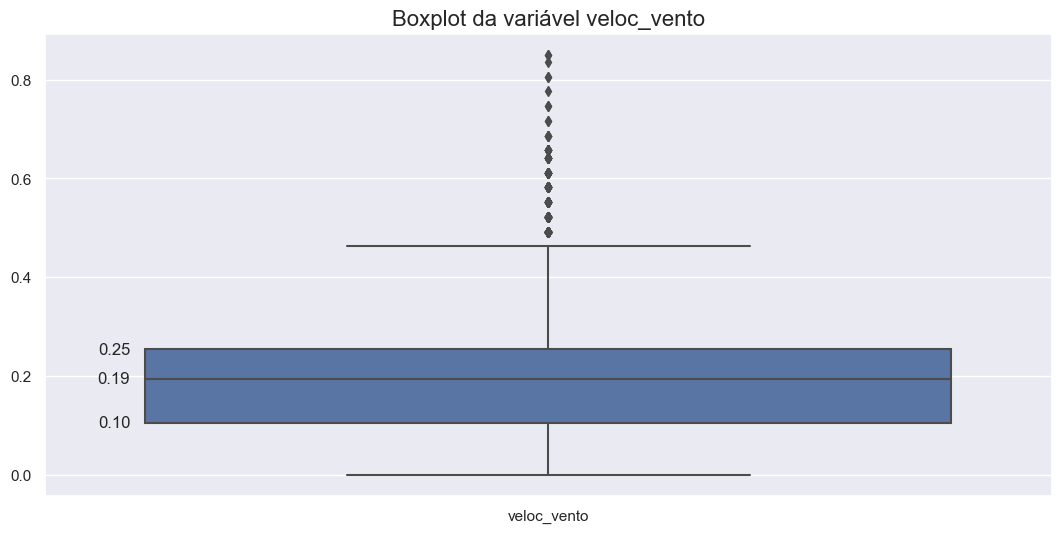

Resumo estatístico da variável casual
 count    17375.000000
mean        35.679655
std         49.308965
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64


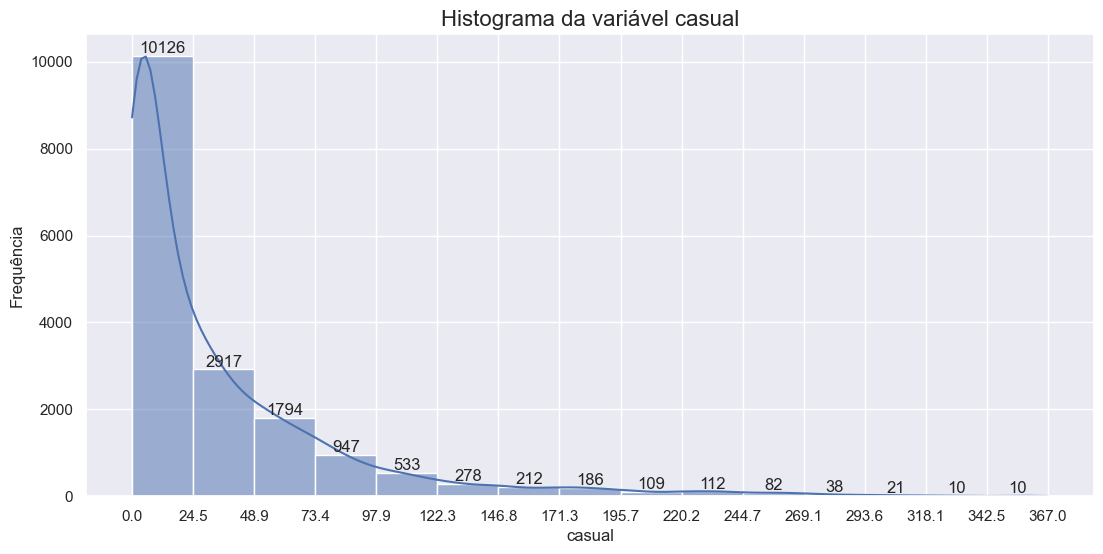

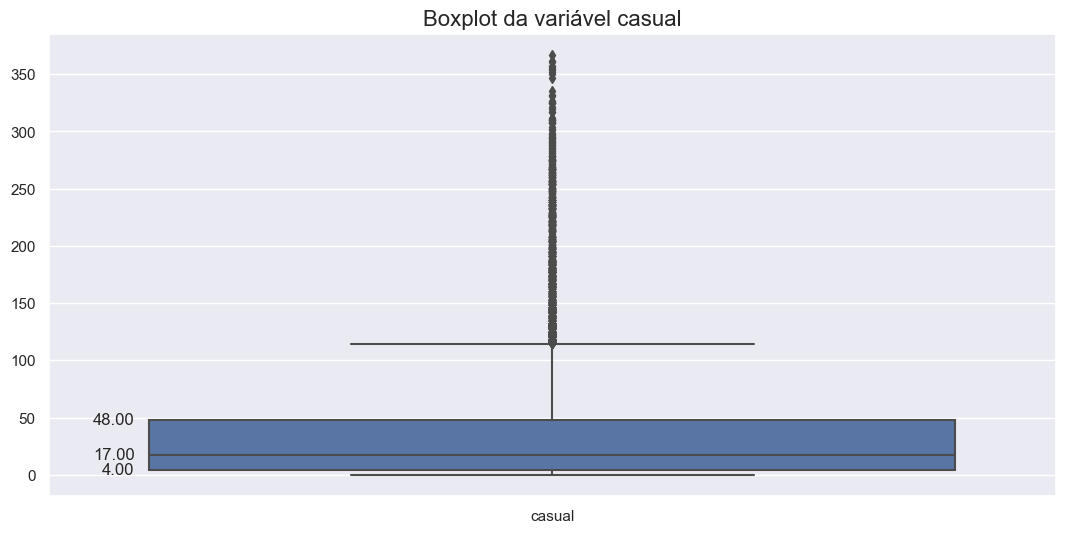

Resumo estatístico da variável registrado
 count    17375.000000
mean       153.795281
std        151.357529
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registrado, dtype: float64


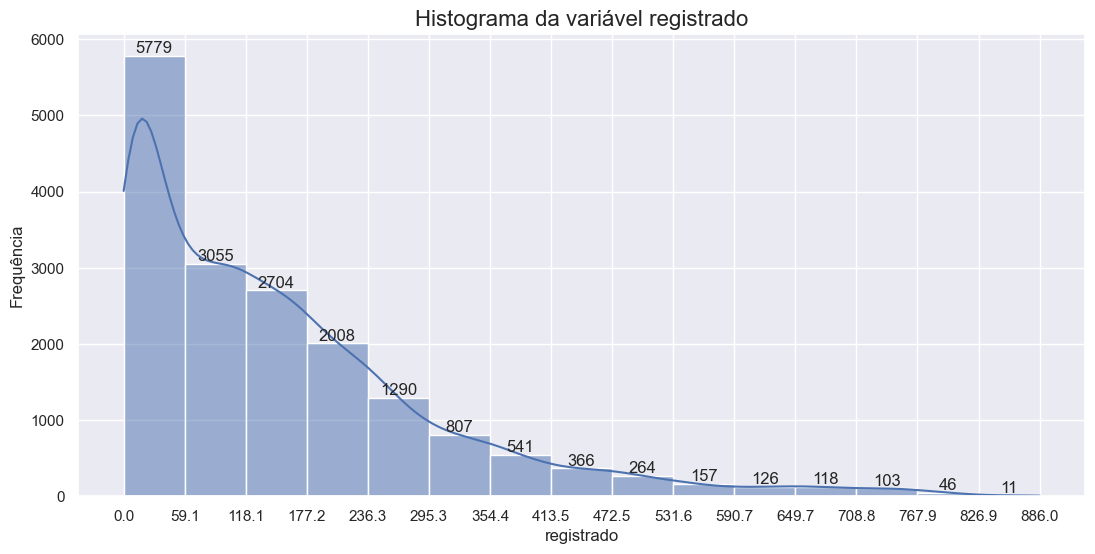

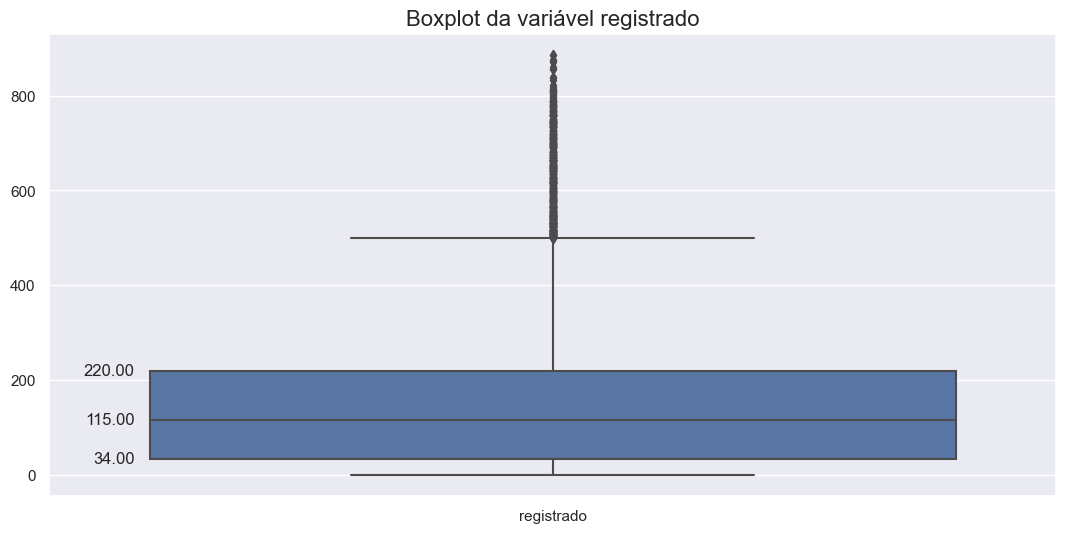

In [23]:
# Loop que percorre todas as colunas
for k in df.columns[0:14]:
    # Verifica se a coluna não possui valores do tipo categórico
    if df[k].dtype.name != "category":
        
        # Sumário estatístico
        print("Resumo estatístico da variável " + k + "\n", df[k].describe())
        
        # Histograma
        desenhaHistograma(df[k], k)
        
        # Boxplot
        desenhaBoxplot(df[k], k)

##### 4.5.4 Análise descritiva das variáveis Categóricas

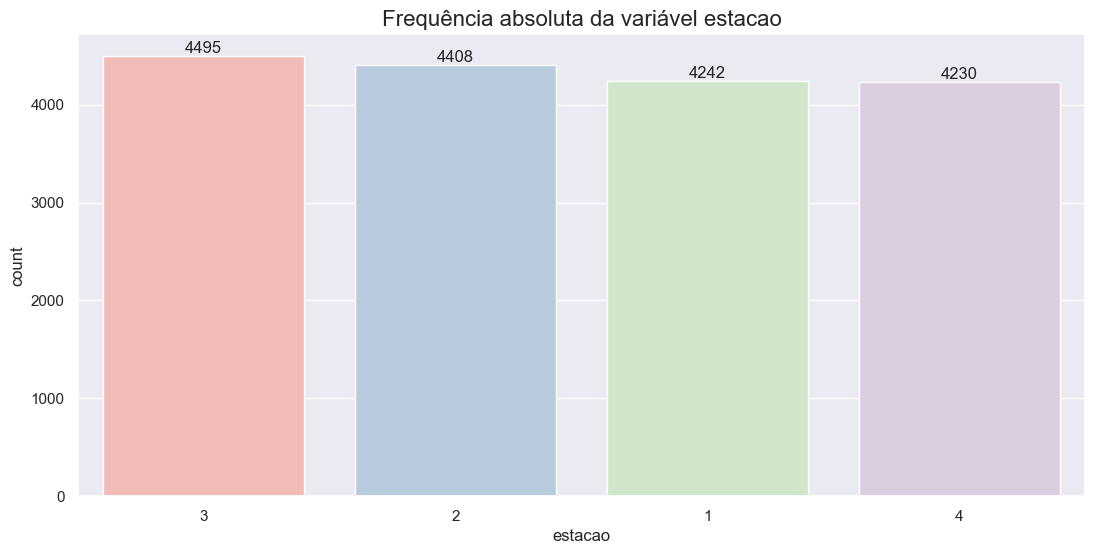

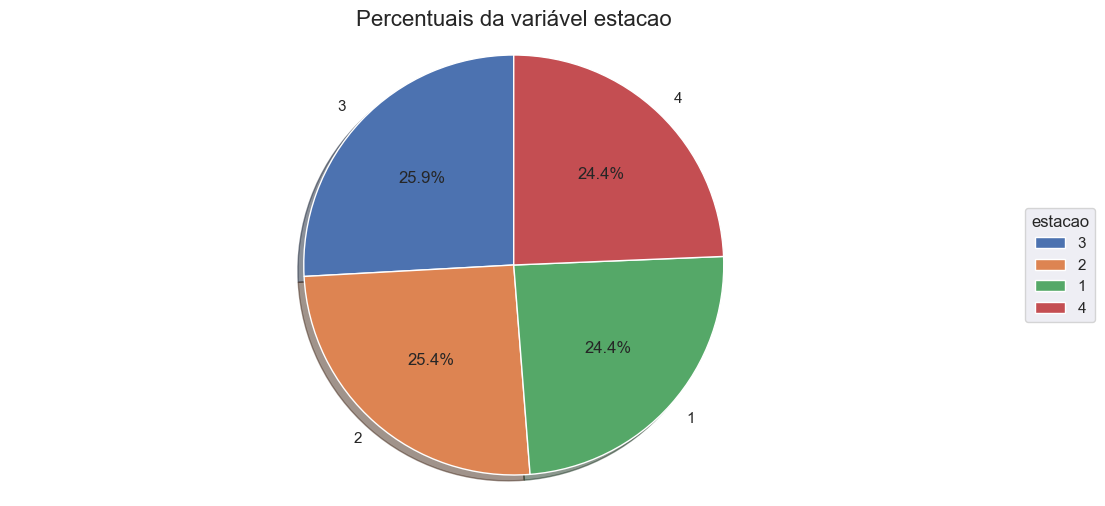

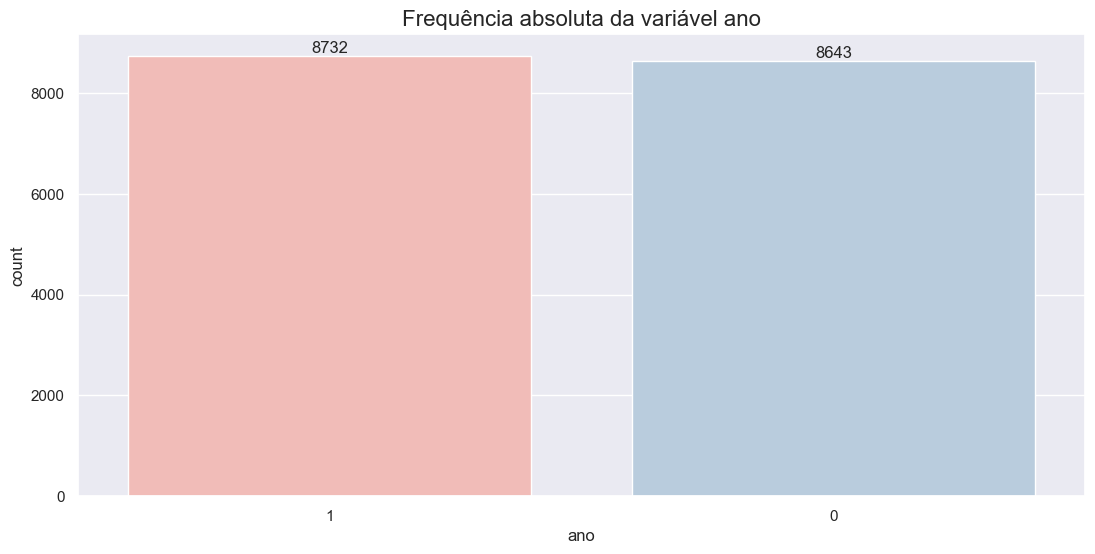

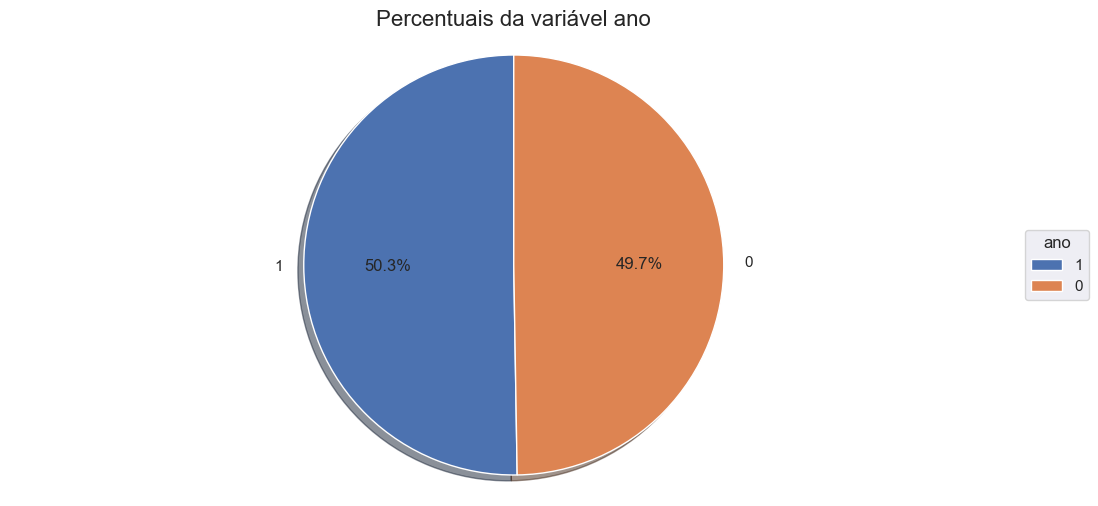

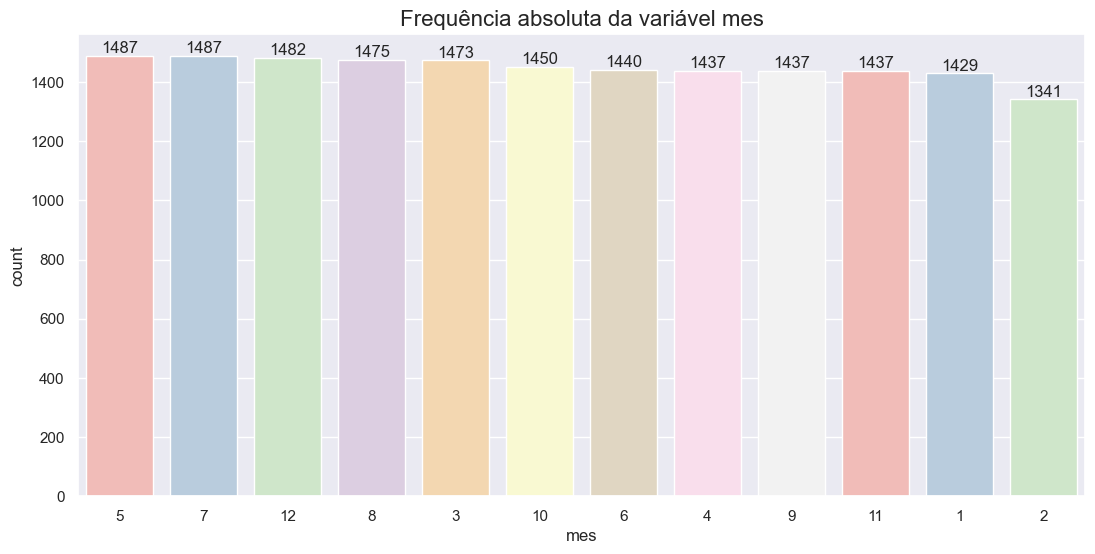

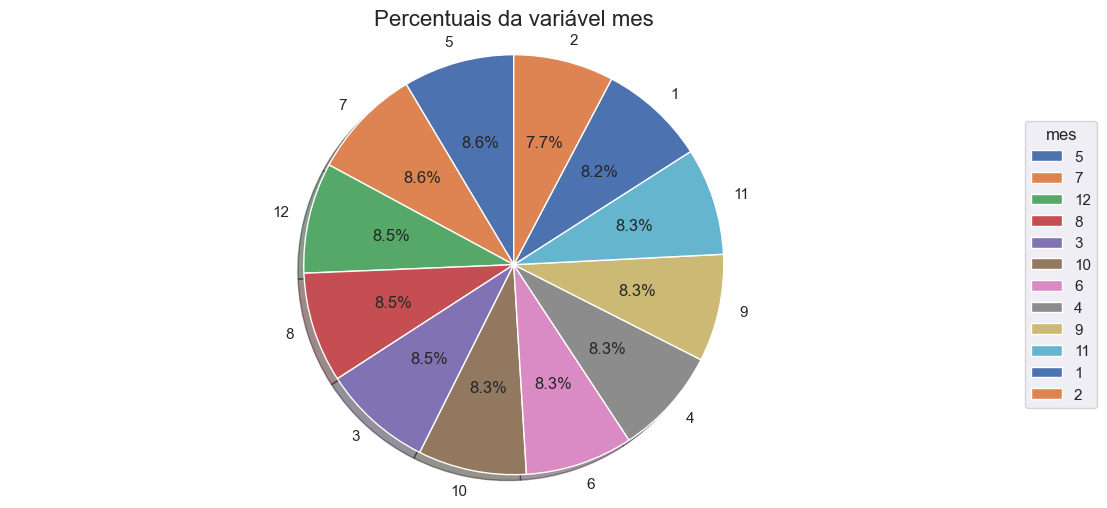

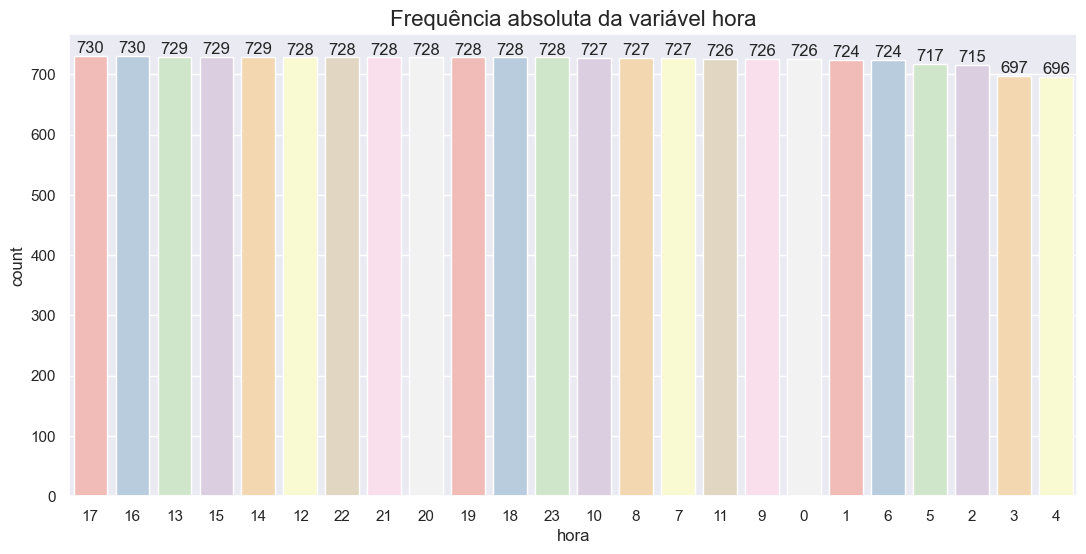

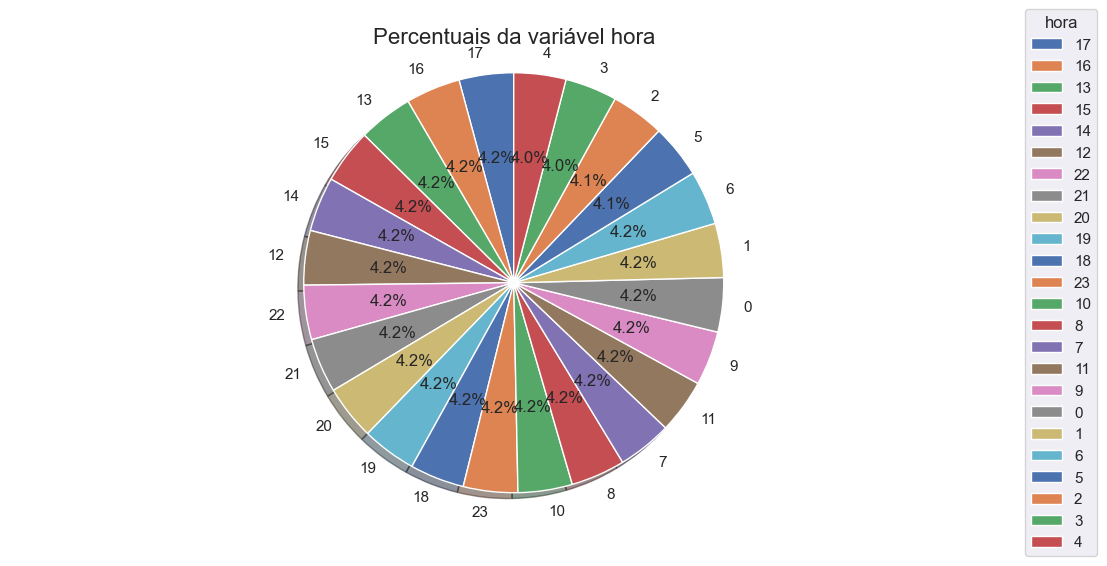

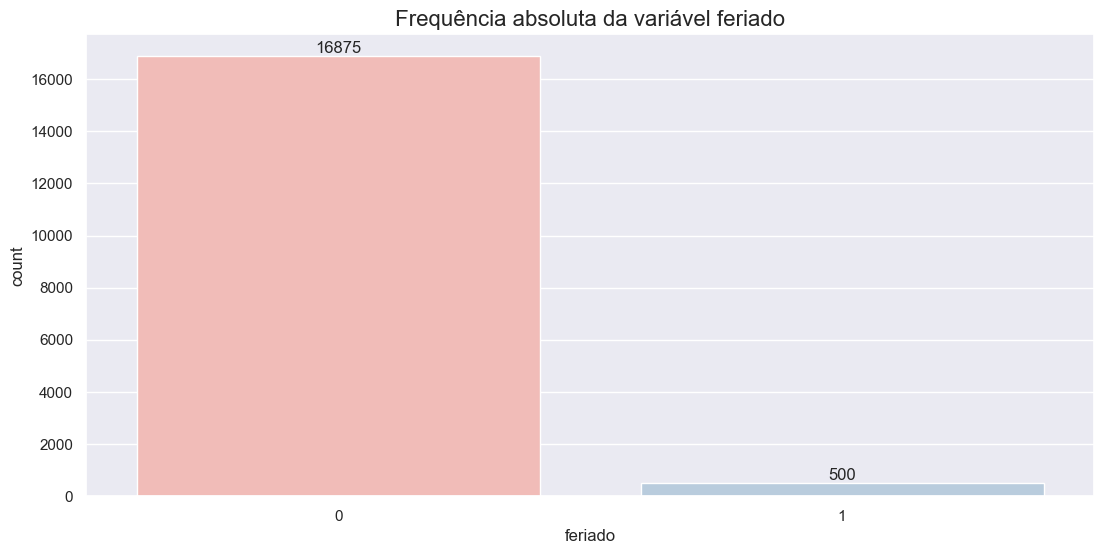

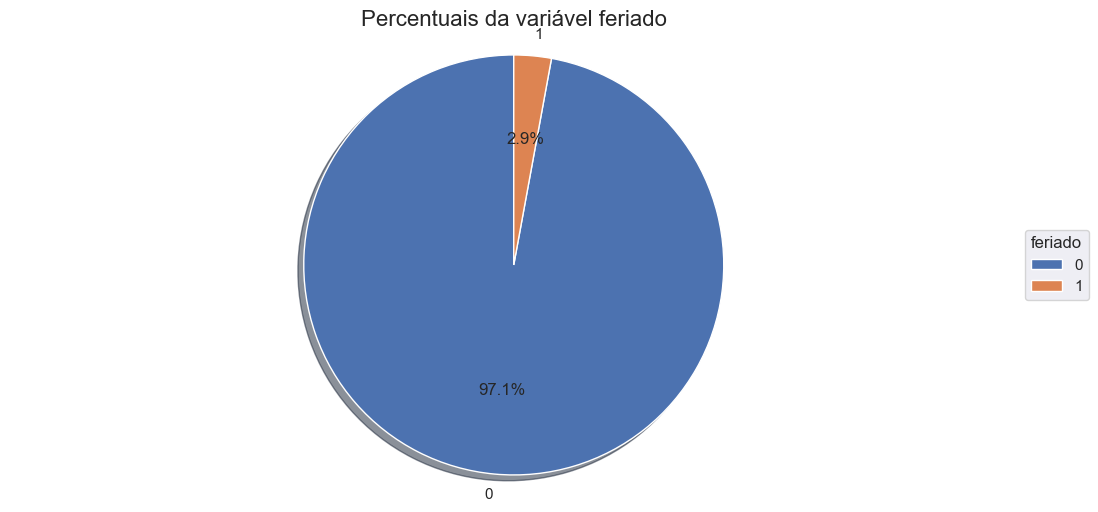

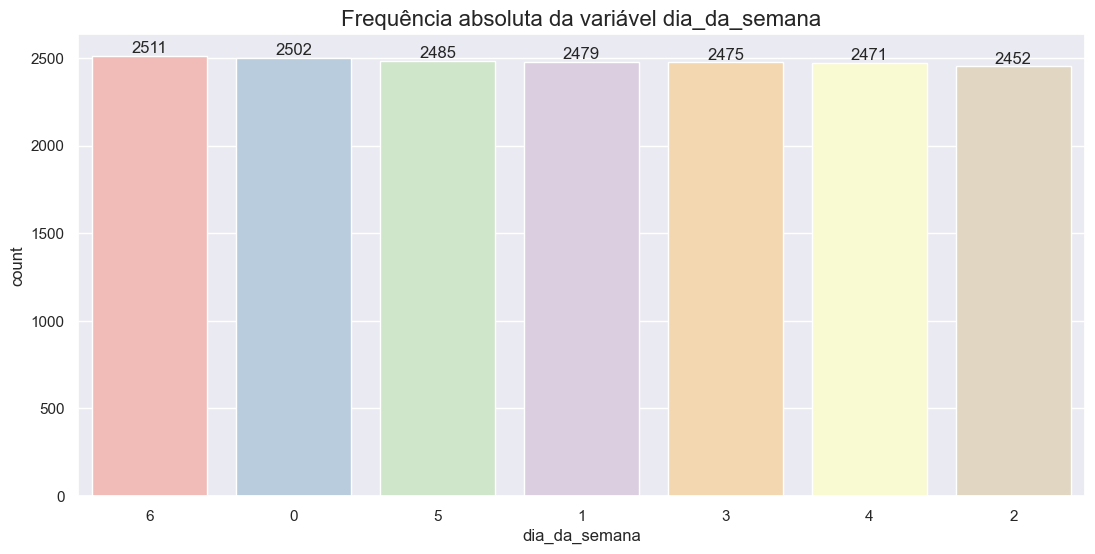

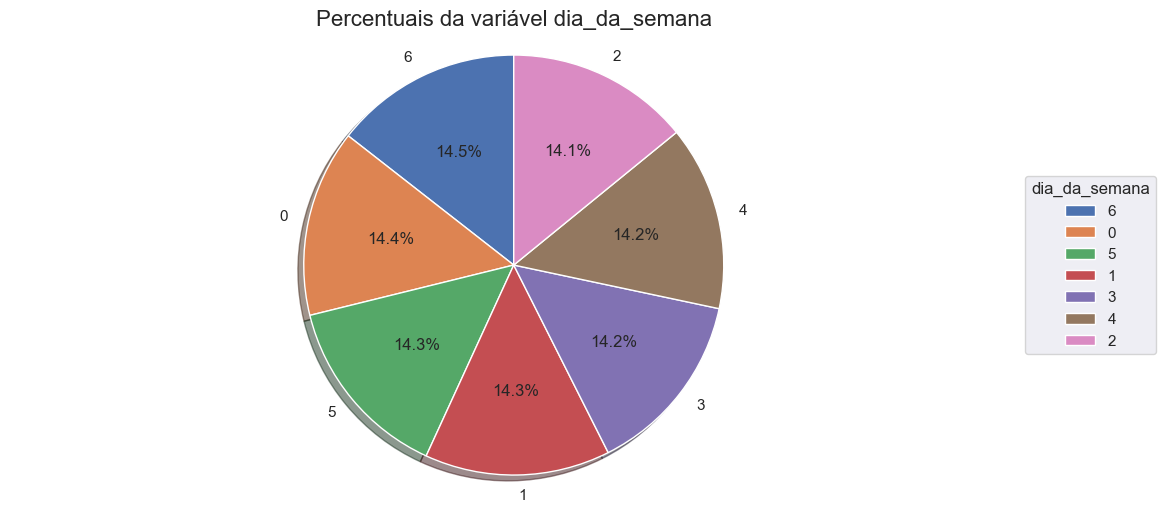

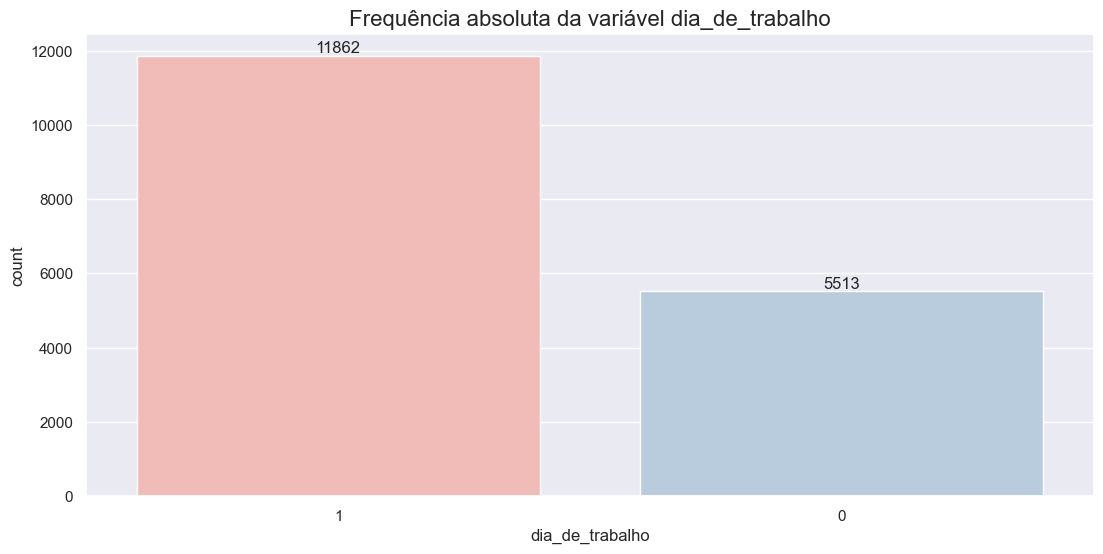

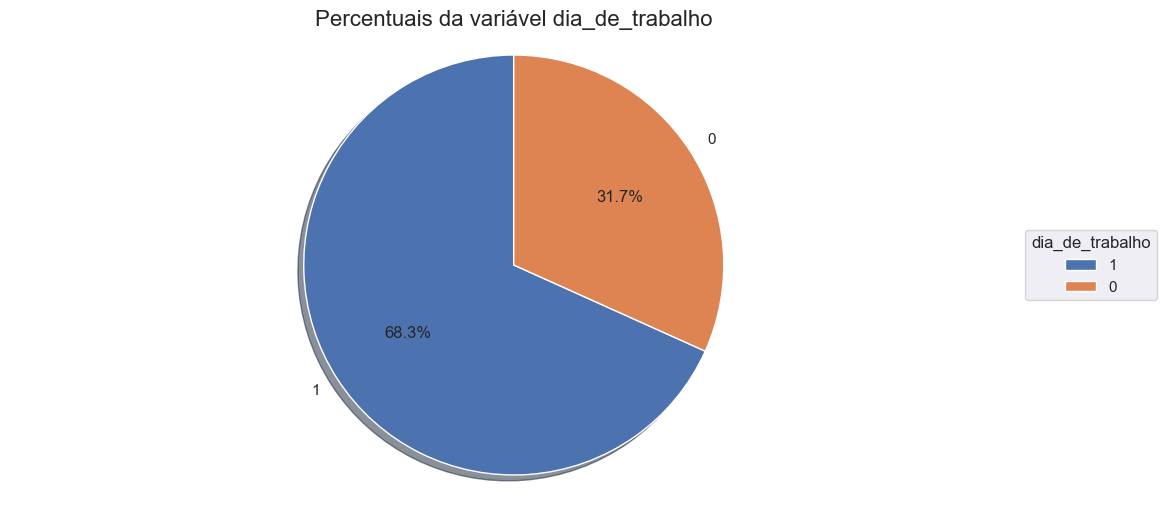

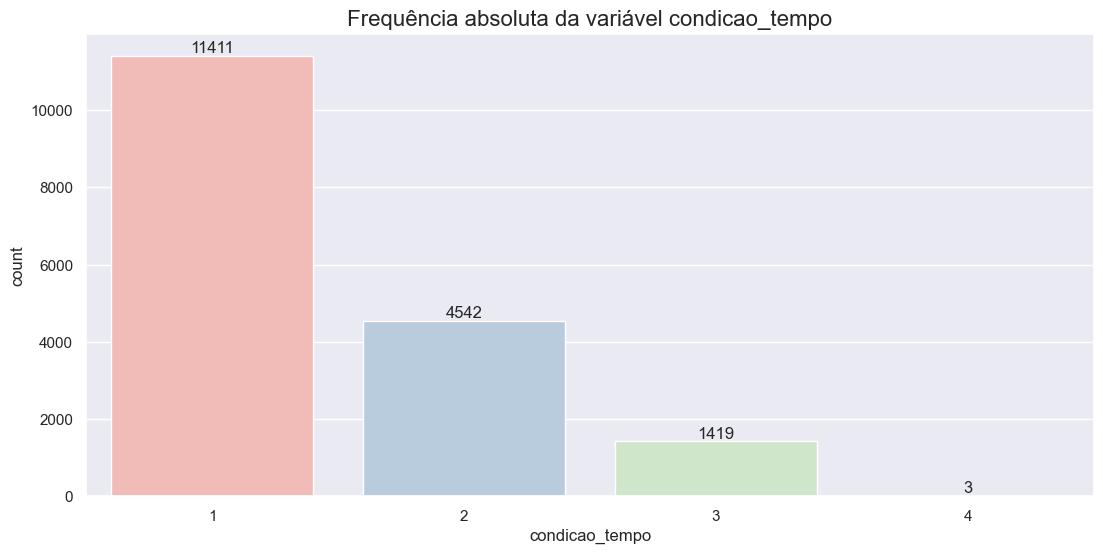

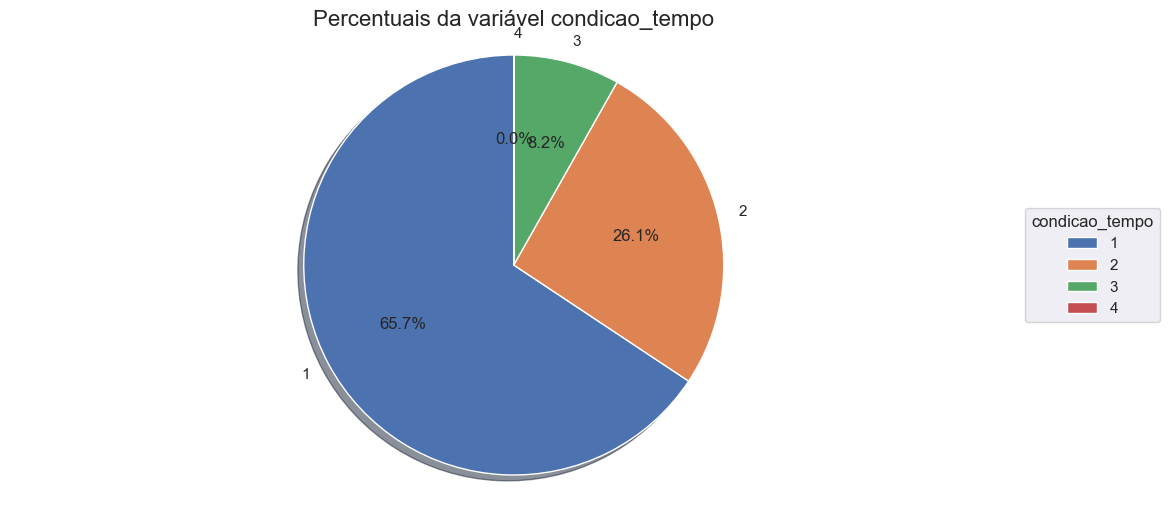

In [24]:
# Loop que percorre todas as colunas
for k in df.columns[0:14]:
    # Verifica se a coluna é do tipo category
    if df[k].dtype.name == "category":
        
        # Frequência absoluta 
        desenhaCountPlot(df[k], k)
        
        # Percentuais
        desenhaPizza(df[k], k)       

##### 4.5.5 Análise descritiva da variável alvo

In [25]:
# Sumário estatístico
pd.DataFrame(df[variavelAlvo].describe())

,contagem
count,17375.000000
mean,189.474935
std,181.391469
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


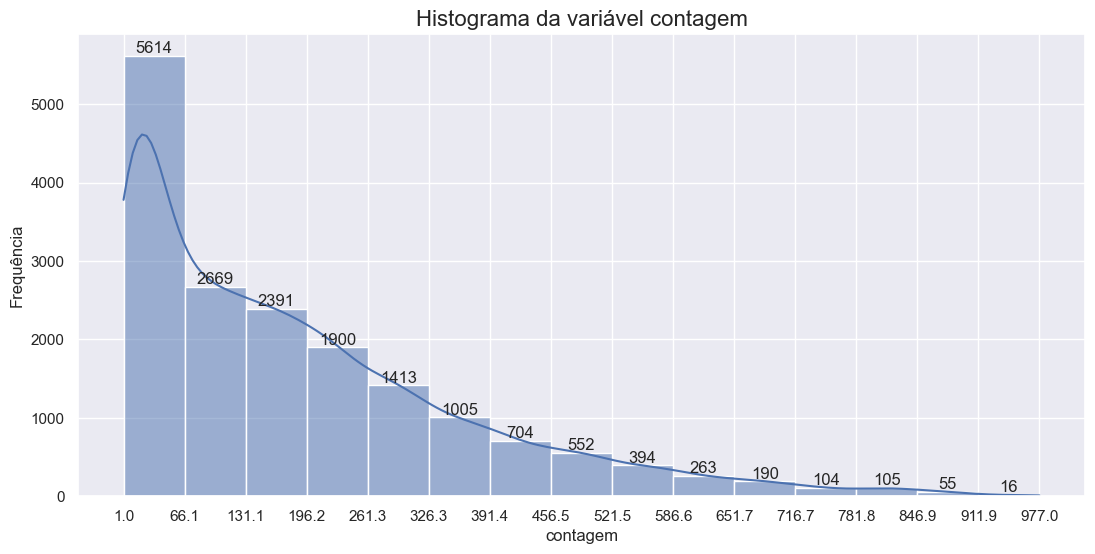

In [26]:
# Frequência absoluta 
desenhaHistograma(df[variavelAlvo], variavelAlvo)

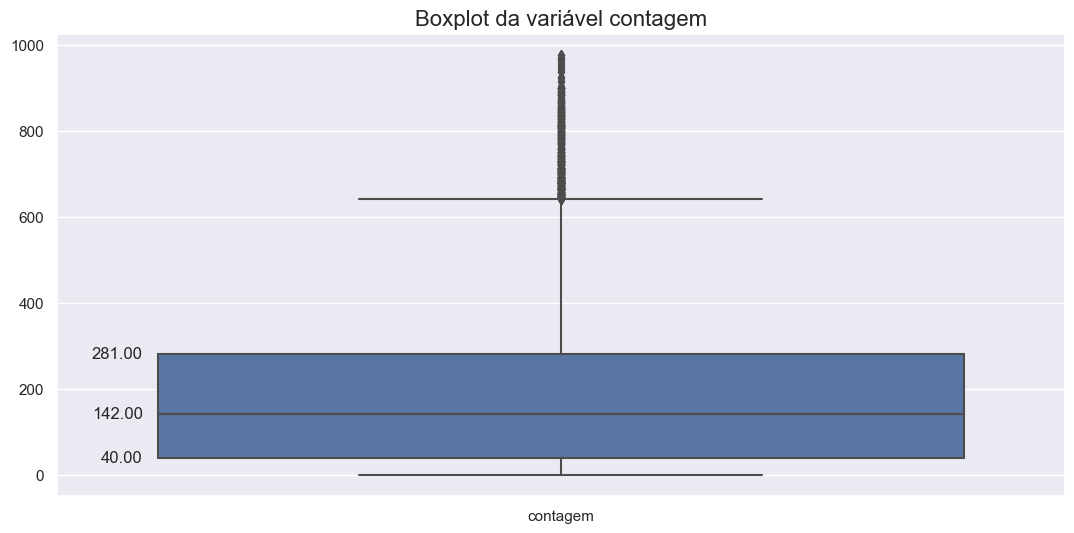

In [27]:
# Percentuais
desenhaBoxplot(df[variavelAlvo], variavelAlvo)

##### 4.5.6 - Correlação entre as variáveis

###### 4.5.6.1 - Matriz de correlação 

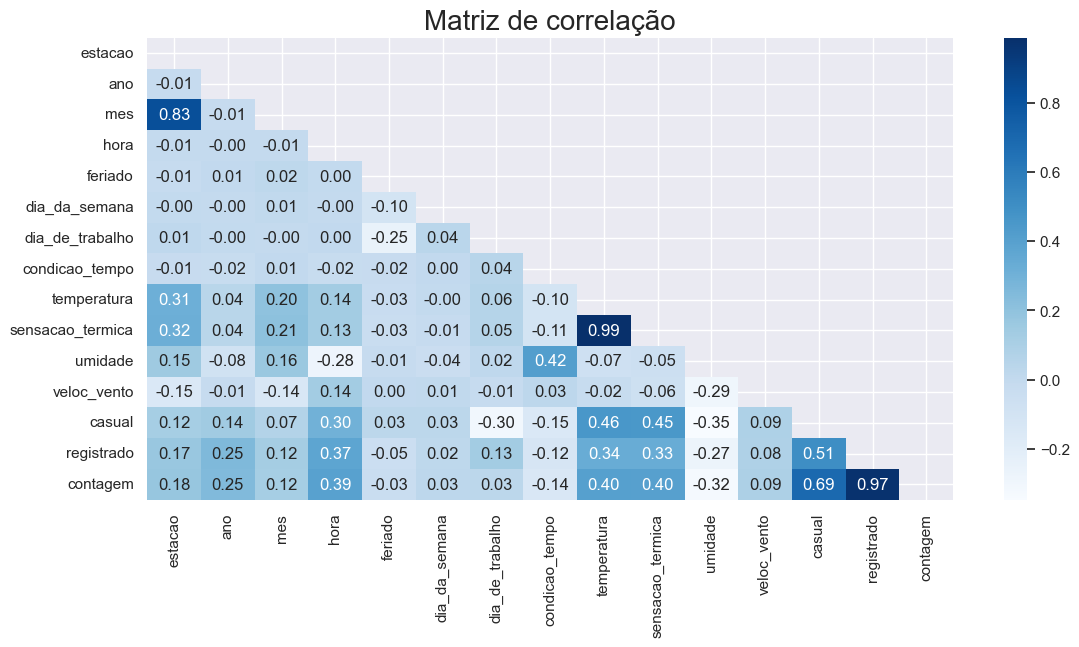

In [28]:
# Calculando a correlação 
correlacao = df.corr()

# Criando uma máscara
mascara = np.zeros_like(correlacao)

# Selecionando a matriz triangular inferior da máscara.
mascara[np.triu_indices_from(mascara)] = True

# Desenhando o gráfico
fig = plt.subplots(figsize=(13, 6))
sns.heatmap(data = correlacao,
            mask = mascara,
            annot = True,
            fmt = '.2f',
            cmap='Blues',

            )
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

###### 4.5.6.2 - Correlação entre a variável Casual e a variável alvo

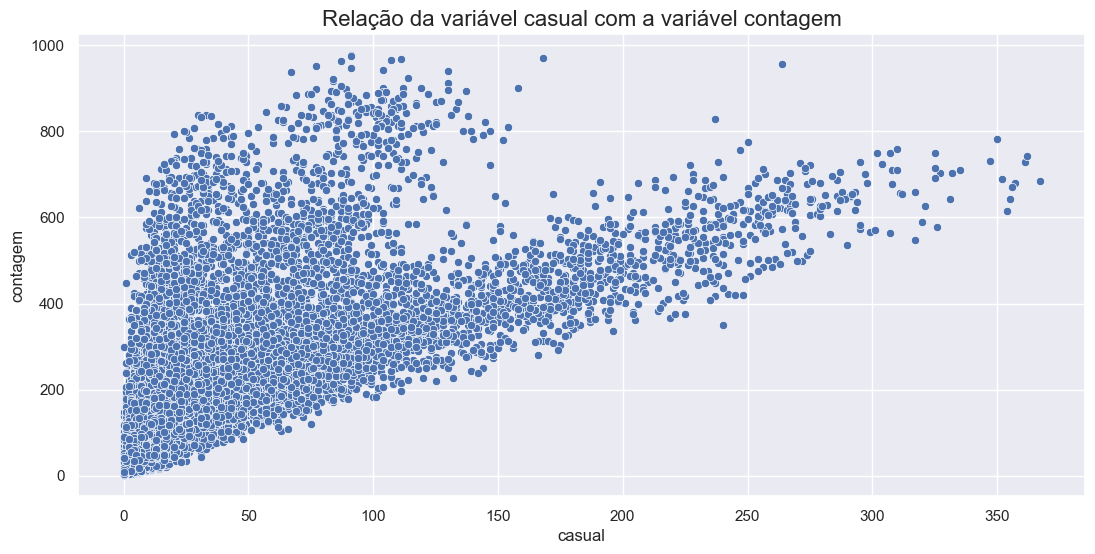

In [29]:
# ScatterPlot
desenhaScatterPlot(df.casual, df.contagem, "casual","contagem" )

###### 4.5.6.3 - Correlação entre a variável Registrado e a variável alvo

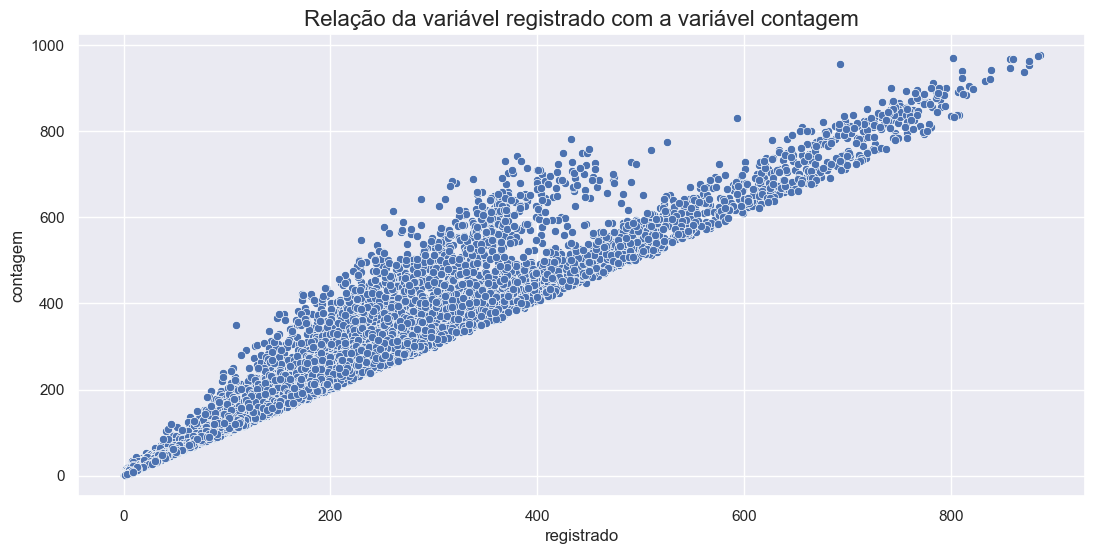

In [30]:
# ScatterPlot
desenhaScatterPlot(df.registrado, df.contagem, "registrado","contagem" )

###### 4.5.6.4 - Analisar os dados de acordo com a variável variavel alvo

###### a) Analisando as variáveis quantitativas de acordo com a variável alvo

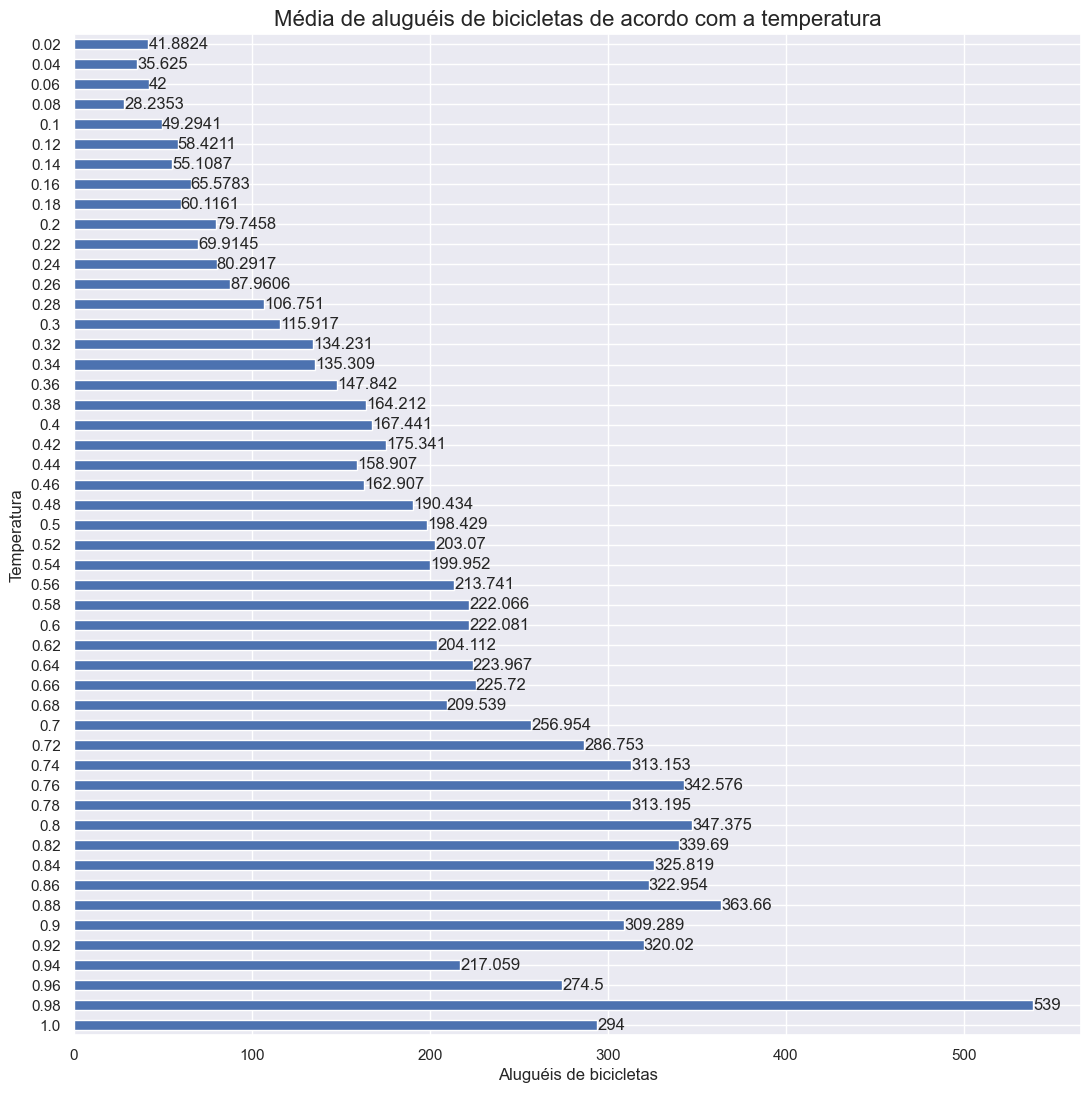

In [31]:
# Gráfico com a média de aluguéis de bicicletas de acordo com a temperatura
ax = df.groupby("temperatura")[variavelAlvo].agg(["mean"]).sort_values(by=["temperatura"], ascending=False).plot.barh(figsize=(13, 13))
plt.title("Média de aluguéis de bicicletas de acordo com a temperatura", fontsize = 16)
plt.xticks(rotation=0)
ax.set_ylabel("Temperatura", fontsize = 12)
ax.set_xlabel("Aluguéis de bicicletas", fontsize = 12)
plt.legend('', frameon=False) # remove a legenda
for barras in ax.containers:
    ax.bar_label(barras)
plt.show()

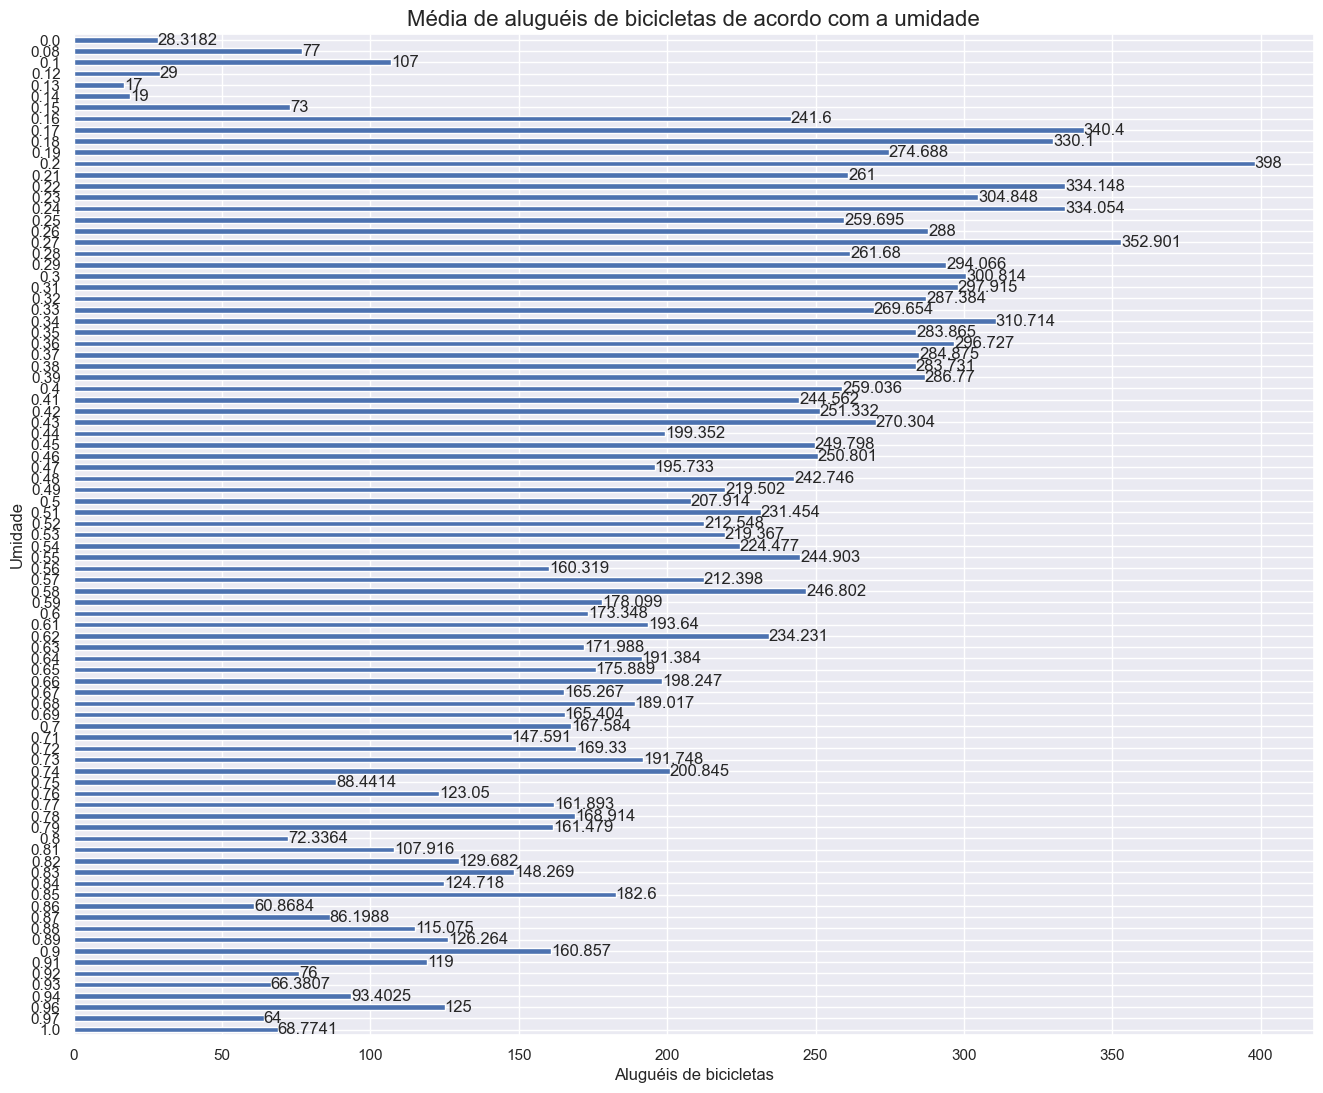

In [32]:
# Gráfico com a média de aluguéis de bicicletas de acordo com a umidade
ax = df.groupby("umidade")[variavelAlvo].agg(["mean"]).sort_values(by=["umidade"], ascending=False).plot.barh(figsize=(16, 13))
plt.title("Média de aluguéis de bicicletas de acordo com a umidade", fontsize = 16)
plt.xticks(rotation=0)
ax.set_ylabel("Umidade", fontsize = 12)
ax.set_xlabel("Aluguéis de bicicletas", fontsize = 12)
plt.legend('', frameon=False) # remove a legenda
for barras in ax.containers:
    ax.bar_label(barras)
plt.show()

###### a) Analisando as variáveis categóricas de acordo com a variável alvo

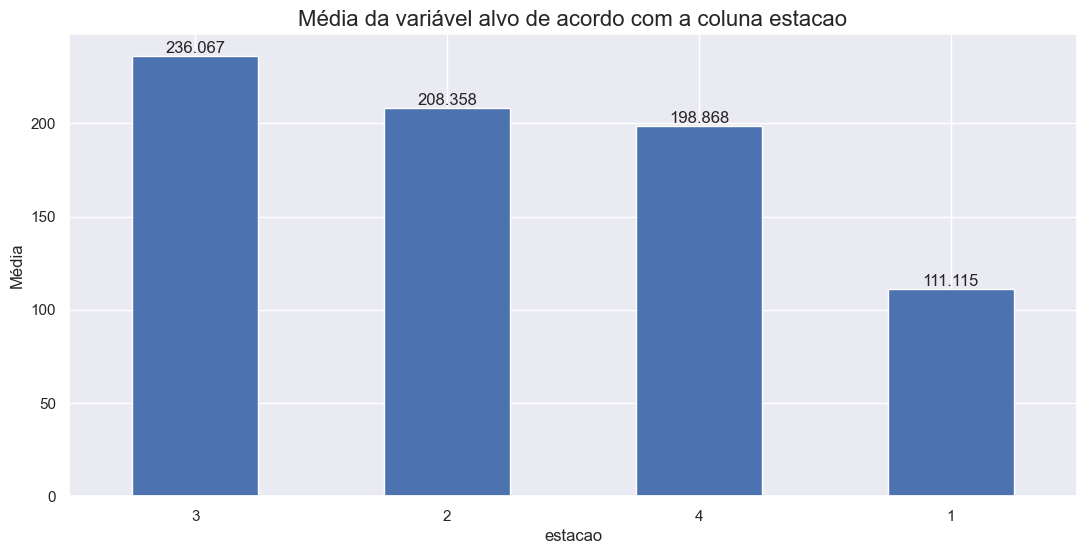

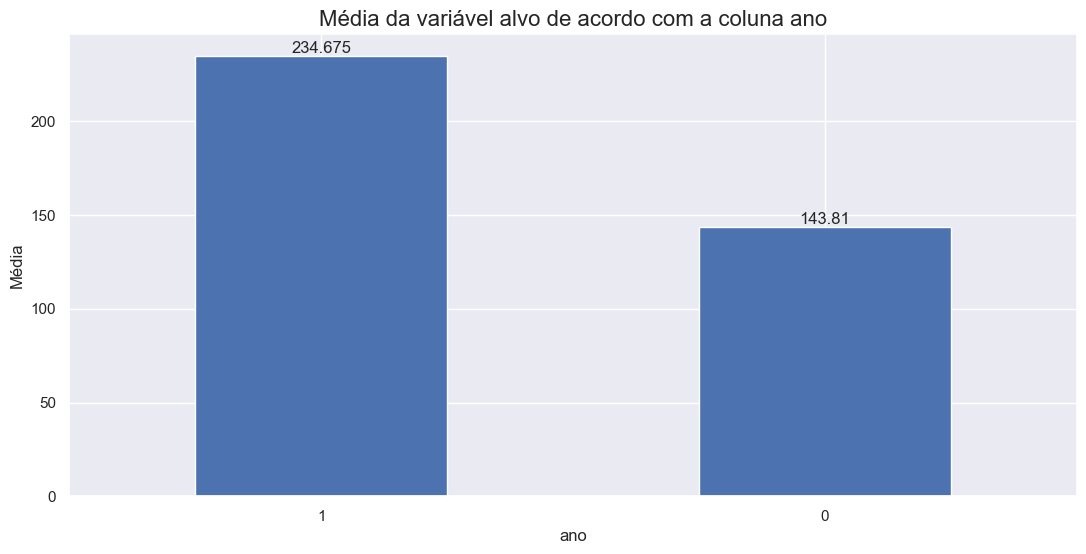

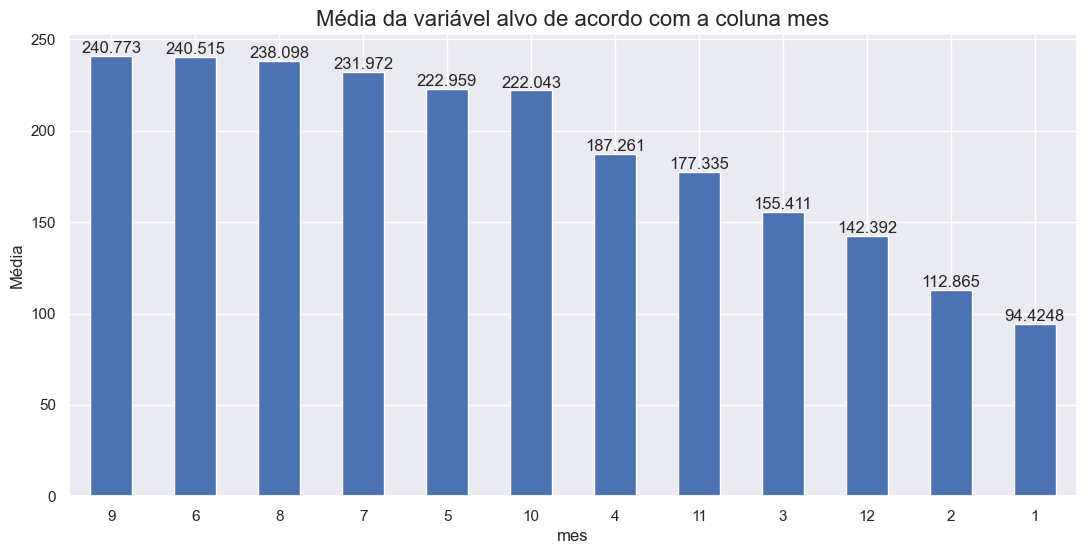

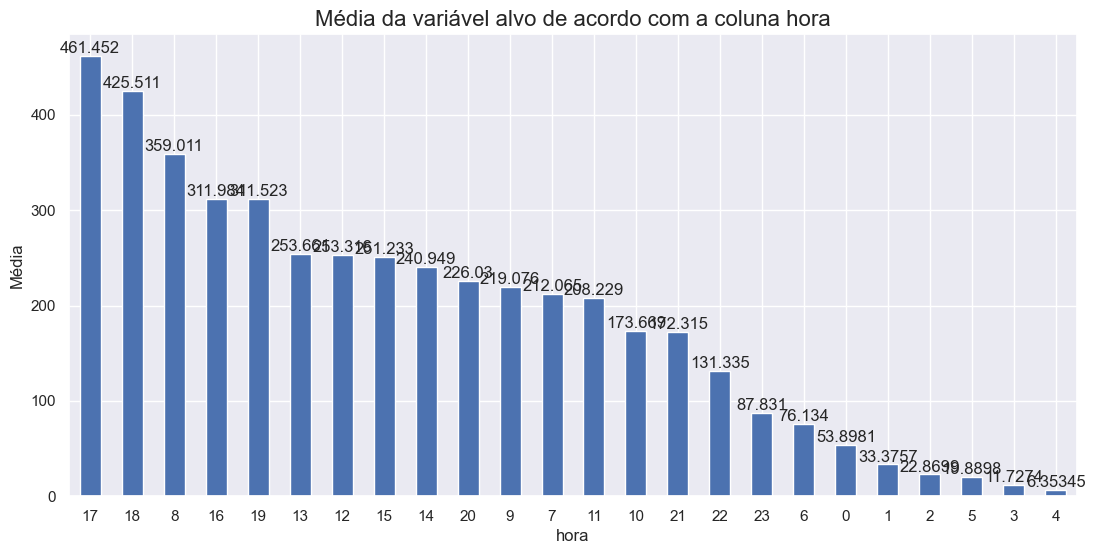

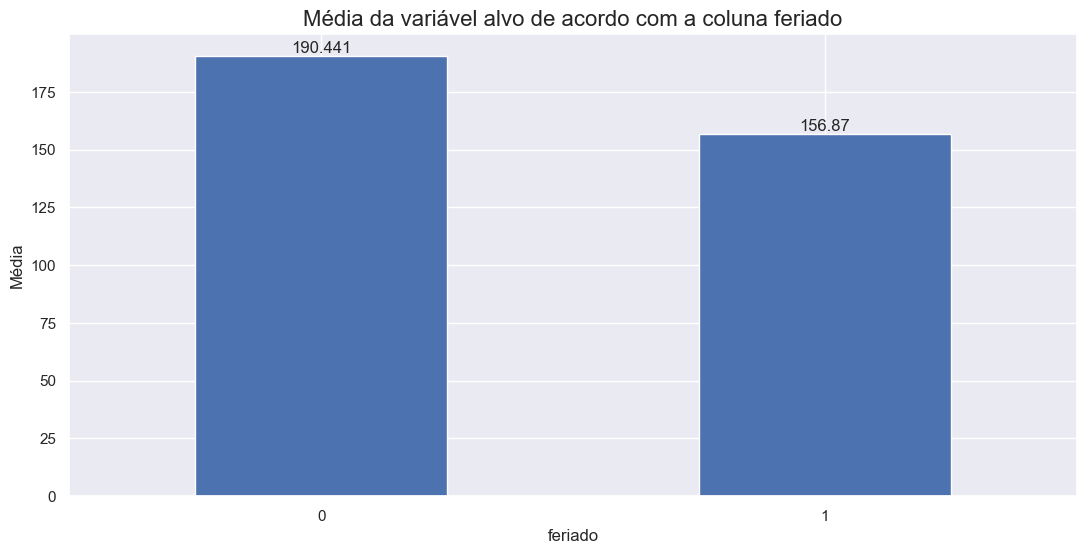

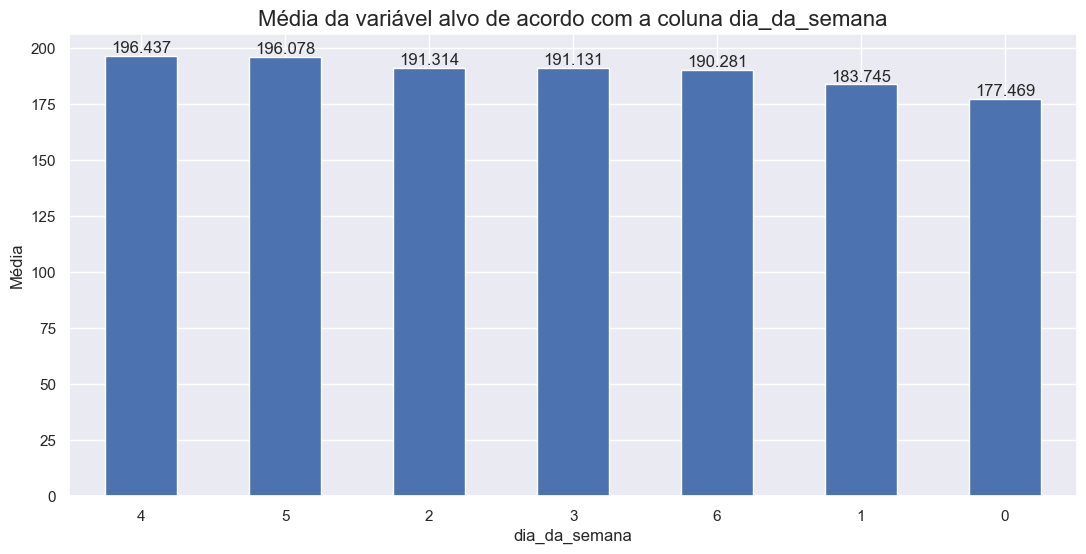

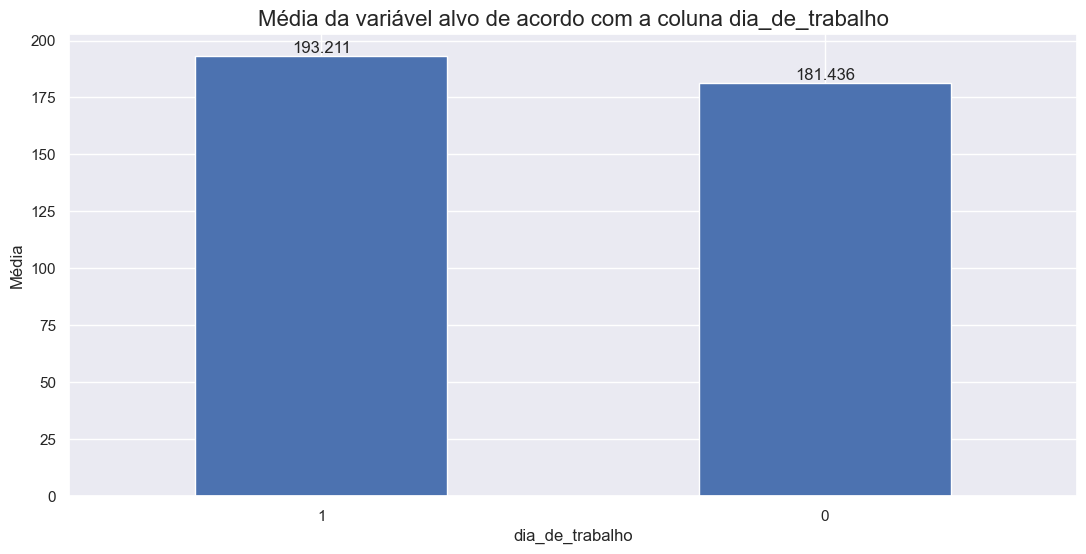

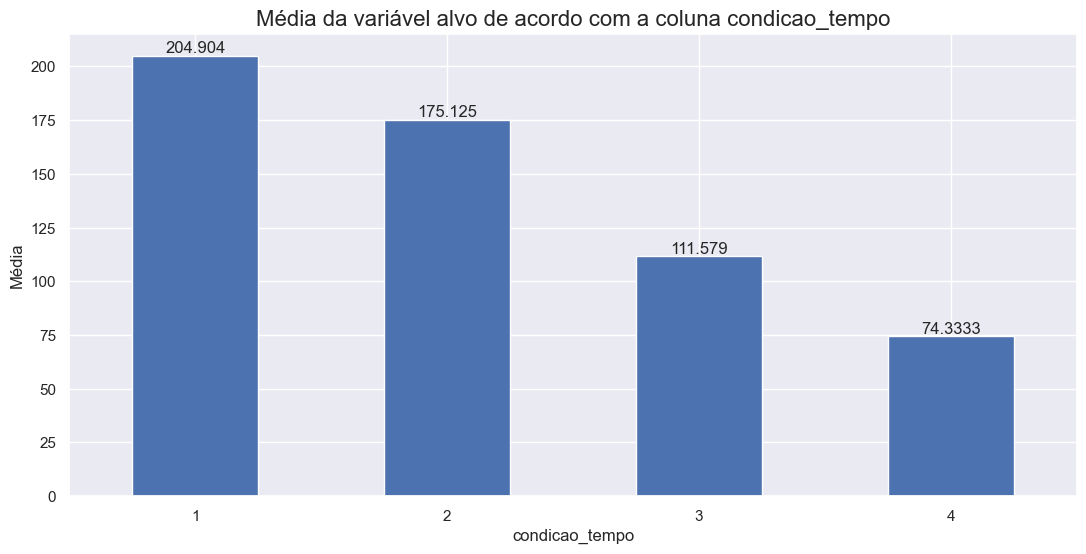

In [33]:
# Loop que percorre todas as colunas
for k in df.columns:
    # Verifica se a coluna é do tipo category
    if df[k].dtype.name == "category":
        # Desenha um barplot com a védia da variável alvo conforme a coluna
        desenhaBarplotMedia(k)

## 5 - Transformando os dados

In [34]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 - Tratando valores iguais a zero

In [35]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:13]:
    
    # Verifica se os valores não são do tipo texto
    if df[k].dtype.name == "category":
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

estacao: 0
ano: 8643
mes: 0
hora: 726
feriado: 16875
dia_da_semana: 2502
dia_de_trabalho: 5513
condicao_tempo: 0


### 5.2 - Identificando e tratando valores outliers

In [ ]:
# Loop que percorre todas as colunas
# A notação de slicing [0:14] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:14]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df[k].dtype.name != "category":
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

### 5.3 - Convertendo variáveis categóricas em números

#### 5.3.1 Convertendo as variáveis preditoras de texto para número

##### 5.3.2.1 Encoding com o Pandas

In [ ]:
df3 = pd.get_dummies(df2)
df3.head()

In [ ]:
# Visualizando o nome das colunas
df3.columns

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

## 6 - Dividindo os dados em treino e teste

ATENÇÃO!! Qual o dataframe será utilizado df2 ou df3 ?

In [36]:
# Fazendo uma cópia do dataframe
dfDados = df2.copy()

In [37]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:14] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:14]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [38]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = LinearRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

,random_state,R2
0,1,100.0
1,2,100.0
2,3,100.0
3,4,100.0
4,5,100.0
...,...,...
194,195,100.0
195,196,100.0
196,197,100.0
197,198,100.0


In [39]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

### 7.1 - Selecionado as melhores variáveis com o Random Forest Regressor

In [ ]:
# Criando o modelo
randomForestRegressor = RandomForestRegressor(random_state=0)

# Treinando o modelo
randomForestRegressor.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = randomForestRegressor.feature_importances_, index = dfDados.columns[0:14])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Importância das variáveis - Random Forest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.2 - Selecionado as melhores variáveis com o SelectKBest

In [ ]:
# Cria o objeto SelectKBest
selectkBest = SelectKBest(k = 4)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = selectkBestTreinado.scores_, index = dfDados.columns[0:14])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Importância das variáveis - SelectKBest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.3 - Selecionado as melhores variáveis com Eliminação Recursiva de Atributos RFE 

In [ ]:
# Criando o modelo
extraTreesRegressor = ExtraTreesRegressor(random_state=0)

# Treinando o modelo
extraTreesRegressor.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(extraTreesRegressor)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
plt.title("Importância das variáveis - RFE", fontsize = 16)
plt.bar(dfDados.columns[0:14], eliminacaoRecursivaTreinada.support_)
plt.xticks(rotation=90)
plt.show()

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [ ]:
# Variáveis selecionadas
variaveisSelecionadas = ["INDUS", "RM", "DIS", "TAX", "PTRATIO", "LSTAT"]

In [ ]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [ ]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

In [ ]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Cross Validation

In [40]:
def calculaCrossValidation(dadosEntrada, dadosSaida):
    # Criando uma lista vazia para armazenar os modelos de Machine Learning
    modelos = []
    
    # Adicionando os modelos a lista
    modelos.append(("Regressão Linear", LinearRegression()))
    modelos.append(("Ridge", Ridge()))
    modelos.append(("KNN", KNeighborsRegressor()))
    modelos.append(("SVM", LinearSVR()))
    modelos.append(("Árvore de Decisão", DecisionTreeRegressor()))
    modelos.append(("Random Forest", RandomForestRegressor()))
    modelos.append(("Extra Tree", ExtraTreesRegressor()))
    modelos.append(("Bagging", BaggingRegressor()))
    modelos.append(("AdaBoost", AdaBoostRegressor()))
    modelos.append(("Voting", VotingRegressor(estimators=[("AD",DecisionTreeRegressor()),("GB", GradientBoostingRegressor()),("RL", LinearRegression())])))
    modelos.append(("Gradient Tree Boosting", GradientBoostingRegressor()))
    modelos.append(("XGBoost", XGBRegressor()))    

    # Criando um Dataframe para armazenar a média de cada um dos algoritmos testados.
    dfMedias   = pd.DataFrame(columns = ['Algoritmo', 'Media'])

    # Define a quantidade de folds
    numeroFolds = 5

    # Define a semente para criar os folds
    seed = 28

    # KFold divide o conjunto de dados em grupos de amostras, chamados folds
    kfold = KFold(n_splits = numeroFolds, shuffle=True, random_state = seed)

    for nome, construtor in modelos:
        # Cross Validation
        resultados = cross_val_score(construtor, dadosEntrada, dadosSaida, cv=kfold, scoring="r2")

        # Calcula a média dos resultados
        media = resultados.mean()*100

        # Define os parâmetros para adicionar a linha no dataframe
        novaLinha = {"Algoritmo": nome,
                     "Media": media}

        # Adicionando uma linha no final do DataFrame
        dfMedias.loc[len(dfMedias.index)] = novaLinha

    # Ordena o dataframe da maior média para a menor    
    dfMedias.sort_values(by=["Media"], ascending=False, inplace=True)
    
    return dfMedias

### 9.1 - Cross Validation com dados originais

In [41]:
# Calcula cross validation
calculaCrossValidation(X, y)

,Algoritmo,Media
0,Regressão Linear,100.000000
1,Ridge,100.000000
3,SVM,100.000000
6,Extra Tree,99.983896
2,KNN,99.980424
9,Voting,99.978867
5,Random Forest,99.976709
7,Bagging,99.967856
11,XGBoost,99.966177
10,Gradient Tree Boosting,99.917495


### 9.2 - Cross Validation com dados normalizados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de entrada
xNormalizado = min_max_scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xNormalizado, y)

### 9.3 - Cross Validation com dados padronizados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de entrada
xPadronizado = scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xPadronizado, y)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [42]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de regressão

In [43]:
# DataFrame para comparar a acurácia de cada algoritmo
# DataFrame para comparar a R2 de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Regressão Linear", "Ridge", "SVM"],
                   "R2": ["-", "-", "-"],
                   "Erro Absoluto Medio": ["-", "-", "-"]
                   }
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Regressão Linear,-,-
1,Ridge,-,-
2,SVM,-,-


### 11.1 - Regressão Linear

In [44]:
# Criando o modelo
linearRegression = LinearRegression()

# Treinamento do modelo
linearRegression.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearRegression.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 100.00%
Erro absoluto médio: 0.00


In [45]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[0,2] =  round(mae,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Regressão Linear,100.0,0.0
1,Ridge,-,-
2,SVM,-,-


### 11.2 - Ridge

In [46]:
# Criando o modelo
ridge = Ridge()

# Treinamento do modelo
ridge.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = ridge.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 100.00%
Erro absoluto médio: 0.00


In [47]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[1,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Regressão Linear,100.0,0.0
1,Ridge,100.0,0.0
2,SVM,-,-


### 11.3 - SVM

In [48]:
# Criando o modelo
linearSvr = LinearSVR()

# Treinamento do modelo
linearSvr.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearSvr.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 100.00%
Erro absoluto médio: 0.00


In [49]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[2,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Regressão Linear,100.0,0.0
1,Ridge,100.0,0.0
2,SVM,100.0,0.0


## 12 - Selecionando o modelo

In [50]:
# Ordena o DataFrame de acordo o valor do Erro Absoluto Medio, em ordem crecente
dfComparaAlgoritmo.sort_values(by=["Erro Absoluto Medio"], inplace=True)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Regressão Linear,100.0,0.0
1,Ridge,100.0,0.0
2,SVM,100.0,0.0


In [51]:
# Selecionando o modelo final
modeloFinal = linearRegression
modeloFinal

LinearRegression()

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [52]:
# Salvando o modelo
arquivo = 'Dados/Bike-Sharing/modeloRegresorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [53]:
# Carregando o modelo
modeloRegresor = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloRegresor

Modelo carregado!


LinearRegression()

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [54]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/Bike-Sharing/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/Bike-Sharing/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [55]:
# Visualizando o dataframe
dfValidacao

,estacao,ano,mes,hora,feriado,dia_da_semana,dia_de_trabalho,condicao_tempo,temperatura,sensacao_termica,umidade,veloc_vento,casual,registrado,contagem
15652,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389
3085,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146


In [56]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[dfValidacao.columns[0:14]].values
    # Fazendo previsões
    previsoes = modeloRegresor.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[df.columns[0:14]].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloRegresor.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[df.columns[0:14]].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloRegresor.predict(novosDadosPadronizados)

previsoes

array([389., 146.])